 Logistic Regression -  Students Pass/Fail Prediction based on both JEEPRE & JEEMAINS exam score

In [3]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import time

In [4]:
## Perform Logistic Regression on labelled data
path='C:/Users/devar/Desktop/data set1'
path

'C:/Users/devar/Desktop/data set1'

In [5]:
os.chdir(path)

In [6]:
os.listdir()

['cast.csv',
 'Copy of Countif Exercise - 1.xlsx',
 'CORELATION ANALYSIS.csv',
 'Iphone Purchase data.csv',
 'salary and position.csv',
 'SATISTICS.xlsx',
 'Students.csv',
 'Titanic_dataset.csv']

In [7]:
data=pd.read_csv('Students.csv')
data.head()

,JEEPRE,JEEMAINS,STATUS
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


In [8]:
### Analysis of the data - EDA
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   JEEPRE    100 non-null    float64
 1   JEEMAINS  100 non-null    float64
 2   STATUS    100 non-null    int64  
dtypes: float64(2), int64(1)
memory usage: 2.5 KB


C:\Users\devar\.conda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


65.64427405779999

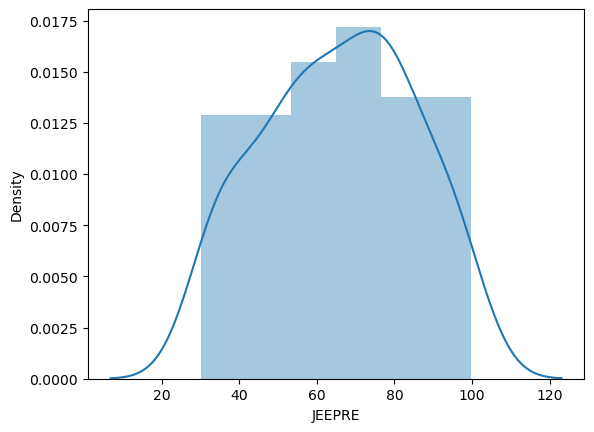

In [9]:
sns.distplot(data['JEEPRE'])
data['JEEPRE'].mean()

C:\Users\devar\.conda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


66.22199808840003

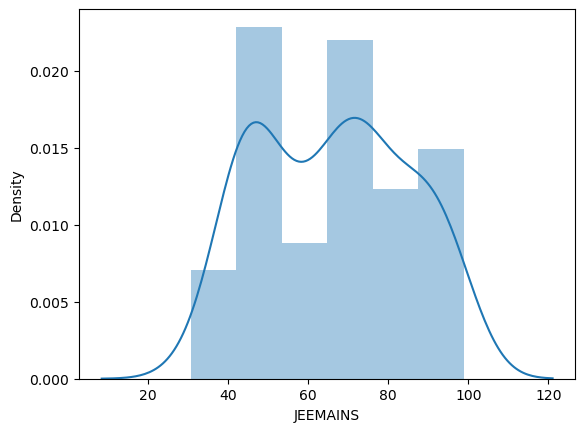

In [10]:
sns.distplot(data['JEEMAINS'])
data['JEEMAINS'].mean()

In [11]:
data.describe()

,JEEPRE,JEEMAINS,STATUS
count,100.000000,100.000000,100.000000
mean,65.644274,66.221998,0.600000
std,19.458222,18.582783,0.492366
min,30.058822,30.603263,0.000000
25%,50.919511,48.179205,0.000000
50%,67.032988,67.682381,1.000000
75%,80.212529,79.360605,1.000000
max,99.827858,98.869436,1.000000


<AxesSubplot:xlabel='JEEMAINS', ylabel='JEEPRE'>

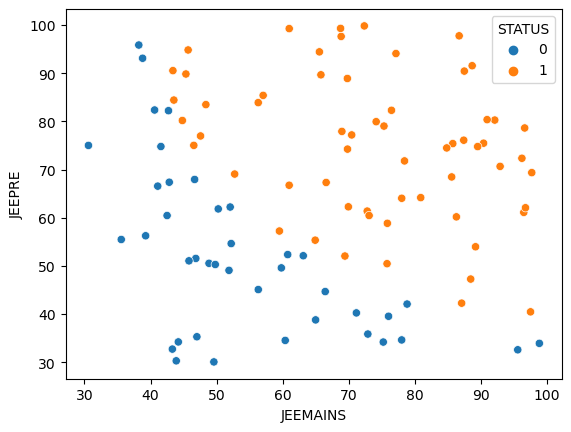

In [12]:
sns.scatterplot(x='JEEMAINS',y='JEEPRE',hue='STATUS',data=data)

In [13]:
print("The number of rows - ",data.shape[0])

The number of rows -  100


In [14]:
data.STATUS.value_counts()

1    60
0    40
Name: STATUS, dtype: int64

In [15]:
## Define X and y values
X=data[['JEEPRE','JEEMAINS']]
y=data['STATUS']

In [17]:
            ### OR
#X=data.iloc[:,0:2]
#y=data.iloc[:,-1]
#X

In [18]:
from sklearn.linear_model import LogisticRegression

In [19]:
start=time.time()
model=LogisticRegression()
model_train=model.fit(X,y)
end=time.time()
print("The model Training is completed")
print("The time taken-",end-start)

The model Training is completed
The time taken- 0.02605271339416504


In [20]:
pred=model.predict(X)
pred

array([0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1,
       0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1], dtype=int64)

In [21]:
data['predicted']=pred
data

,JEEPRE,JEEMAINS,STATUS,predicted
0,34.623660,78.024693,0,0
1,30.286711,43.894998,0,0
2,35.847409,72.902198,0,0
3,60.182599,86.308552,1,1
4,79.032736,75.344376,1,1
...,...,...,...,...
95,83.489163,48.380286,1,1
96,42.261701,87.103851,1,1
97,99.315009,68.775409,1,1
98,55.340018,64.931938,1,0


In [22]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import ConfusionMatrixDisplay

In [23]:
cm=confusion_matrix(y,pred)
cm

array([[34,  6],
       [ 5, 55]], dtype=int64)

In [24]:
## Accuracy=(TP+TN)/Total

acc=(34+55)/(34+6+55+5)
acc

0.89

In [25]:
accuracy_score(y,pred)

0.89

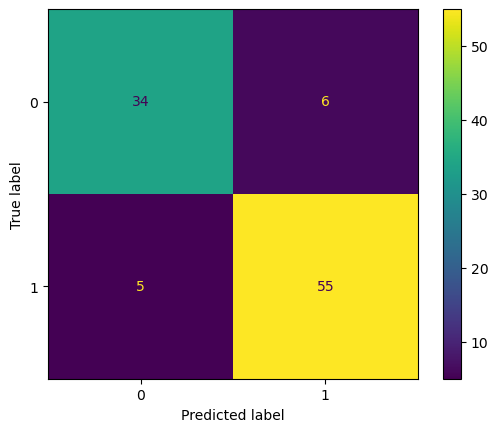

In [26]:
ConfusionMatrixDisplay(cm,display_labels=model_train.classes_).plot()
plt.show()

In [30]:
error=1-acc

In [31]:
error

0.10999999999999999